<a href="https://colab.research.google.com/github/LucasHenrique-dev/estudos-ia/blob/main/projetos/PSO/PSO_estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação

Algoritmos convencionais de otimização (algoritmos determinísticos) possuem limitações:

- Soluções únicas (pouca variabilidade)
- Convergência para ótimos locais
- Problemas de espaço de pesquisa desconhecidos

# Modelo Matemático

- Cada partícula do enxame possui uma posição, velocidade e valor de aptidão (fitness value).
- Cada partícula mantém um particle_bestFitness_value e particle_bestFitness_position.
- O registro do global_bestFitness_position e global_bestFitness_value é mantido.



# Estrutura

- Enxame:

  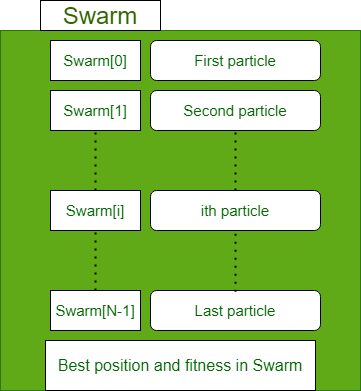

- Partícula (3 dimensões):

  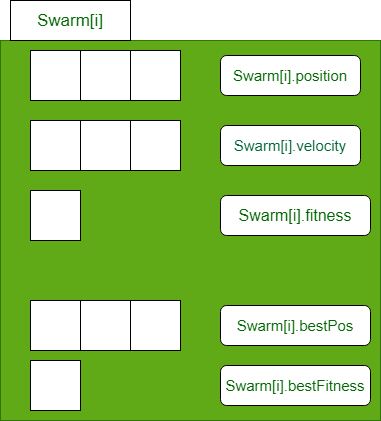

# Algoritmo

- Parâmetros do problema:
  - d: número de dimensões
  - minx: limite Inferior
  - maxx: limite Superior

- Hiperparâmetros do algoritmo:
  - N: número de partículas
  - max_iter: número máximo de iterações
  - w: inércia
  - c1: cognição de partícula
  - c2: influência social de enxame

- Entradas do sistema:
  - Função de fitness
  - Parâmetros do problema
  - Tamanho da população (N)
  - Número máximo de iterações (max_iter)
  - Hiperparâmetros específicos do problema (w, c1, c2)

# Implemetação do Algoritmo

1. Inicializar randomicamente as N partículas do enxame: X1, X2, ... Xn
1. Selecionar os hiperparâmetros: w, c1, c2
1. Aplicar o algoritmo PSO
  1. Iterar por cada partícula max_iter vezes
  1. Computar a velocidade a nova velocidade de cada partícula
  1. Assegurar que a velocidade esteja na faixa [minx, maxx]
  1. Computar a nova posição das partículas considerando a velocidade calculada
  1. Atualiza o _new best_ da partícula e do enxame
1. Retornar a melhor partícula do enxame


Detalhamento do passo 3:
```
For Iter in range(max_iter):  # loop max_iter times  
  For i in range(N):  # for each particle:
      a. Compute new velocity of ith particle
          swarm[i].velocity = w*swarm[i].velocity + 
                r1*c1*(swarm[i].bestPos - swarm[i].position) +
                r2*c2*( best_pos_swarm - swarm[i].position) 
      b. If velocity is not in range [minx, max] then clip it
          if swarm[i].velocity < minx:
              swarm[i].velocity = minx
          elif swarm[i].velocity[k] > maxx:
              swarm[i].velocity[k] = maxx
      c. Compute new position of ith particle using its new velocity
          swarm[i].position += swarm[i].velocity
      d. Update new best of this particle and new best of Swarm
            if swaInsensitive to scaling of design variables.rm[i].fitness < swarm[i].bestFitness:
              swarm[i].bestFitness = swarm[i].fitness
              swarm[i].bestPos = swarm[i].position

            if swarm[i].fitness < best_fitness_swarm
              best_fitness_swarm = swarm[i].fitness
              best_pos_swarm = swarm[i].position
    End-for
  End-for
```


# Equações do sistema

- Funções:
  - Posição: X(t)
  - Velocidade: V(t)

- Equação de atualiação da velocidade:

  ```
  V(t+1) = w.V(t) + c1.r1. [pbest-X(t)] + c2.r2. [gbest-X(t)]
  ```

- Equação de atualiação da posição:

  ```
  X(t+1) = X(t) + V(t)
  ```


# Características do Algoritmo

- Vantagens:
  - Insensível ao dimensionamento das variáveis ​​de projeto.
  - Livre de derivativos
  - Poucos parâmetros
  - Eficiência em busca global
  - Facilidade em paralelizar para processamento concorrente

- Desvantagens:
  - Convergência lenta na etapa de busca refinada (fraca habilidade de busca local)

# Aplicações


## Função de Rastrigin

A função Rastrigin é uma função matemática frequentemente usada para avaliar o desempenho de algoritmos de otimização . Apresenta armadilhas interessantes, na forma de seus muitos mínimos e máximos locais. Foi proposto em 1974 por Rastrigin em duas dimensões e generalizado por Mühlenbein et al..

Sua definição, na dimensão n , é:

$ f(x) = A.n + \sum\limits_{i=1}^{n} [x_i^2 - A.cos(2πx_i)]  $

- A = 10
- Domínio: $x_i$ ϵ [-5,12 ; 5,12]
- Mínimo global: $f(0, ... ,0) = 0.$

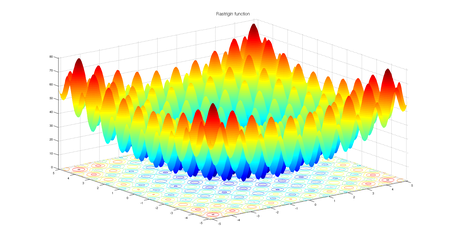

Para um algoritmo de otimização, a função rastrigin é muito desafiadora. Seu comportamento complexo faz com que os algoritmos de otimização muitas vezes fiquem presos em mínimos locais. Ter muitas oscilações de cosseno no plano introduz o comportamento complexo dessa função. Desse modo, ela é frequentemente usada como um problema de teste de desempenho para algoritmos de otimização.

## Função Esfera

A função esfera é uma função padrão para avaliar o desempenho de um algoritmo de otimização.

$f(x_1 ... x_n) = \sum\limits_{i=1}^{n} x_i^2$

- Mínimo global: $f(0, ... ,0) = 0.$

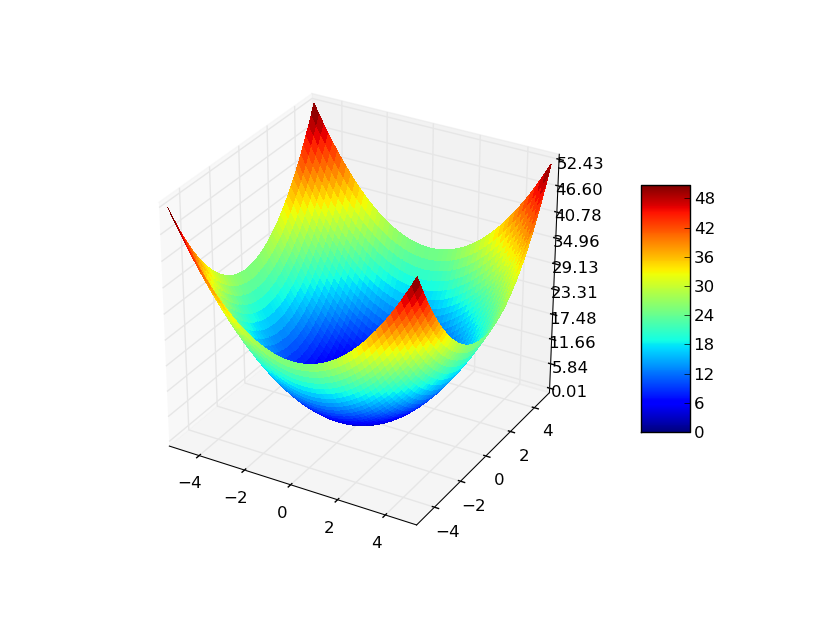

# Implementação

## Objetivo

Encontrar o valor mínimo das funções Rastrigin e esfera

## Importar Bibliotecas

In [1]:
import random
import math    # cos() for Rastrigin
import copy    # array-copying convenience
import sys     # max float

## Funções de Fitness

### Rastrigin

$ f(x) = \sum\limits_{i=1}^{n} [x_i^2 - 10.cos(2πx_i)] + 10.n$

In [2]:
def fitness_rastrigin(position):
  fitnessVal = 0.0
  for i in range(len(position)):
    xi = position[i]
    fitnessVal += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
  return fitnessVal

### Esfera

$f(x_1 ... x_n) = \sum\limits_{i=1}^{n} x_i^2$

In [3]:
def fitness_sphere(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi*xi);
    return fitnessVal;

## Classe da Partícula

In [4]:
class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # initialize position of the particle with 0.0 value
    self.position = [0.0 for i in range(dim)]
 
     # initialize velocity of the particle with 0.0 value
    self.velocity = [0.0 for i in range(dim)]
 
    # initialize best particle position of the particle with 0.0 value
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times to calculate random position and velocity
    # range of position and velocity is [minx, max]
    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)
 
    # compute fitness of particle
    self.fitness = fitness(self.position) # curr fitness
 
    # initialize best position and fitness of this particle
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness

## Algoritmo

In [5]:
# particle swarm optimization function
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)
 
  rnd = random.Random(0)
 
  # create n random particles
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # compute the value of best_position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's fitness
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # main loop of pso
  Iter = 0
  while Iter < max_iter:
     
    # after every 10 iterations
    # print iteration number and best fitness value so far
    if Iter % 10 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # process each particle
       
      # compute new velocity of curr particle
      for k in range(dim):
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               ) 
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)
 
      # is new position a new best for the particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# end pso

# Testes

## Função de Rastrigin

In [12]:
print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 3
fitness = fitness_rastrigin


print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")

num_particles = 50
max_iter = 100

print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")


best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)

print("\nEnd particle swarm for rastrigin function\n")


Begin particle swarm optimization on rastrigin function

Goal is to minimize Rastrigin's function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 best fitness = 8.463
Iter = 20 best fitness = 4.792
Iter = 30 best fitness = 2.223
Iter = 40 best fitness = 0.251
Iter = 50 best fitness = 0.251
Iter = 60 best fitness = 0.061
Iter = 70 best fitness = 0.007
Iter = 80 best fitness = 0.005
Iter = 90 best fitness = 0.000

PSO completed


Best solution found:
['0.000618', '0.000013', '0.000616']
fitness of best solution = 0.000151

End particle swarm for rastrigin function



## Função Esfera

In [10]:
print("\nBegin particle swarm optimization on sphere function\n")
dim = 3
fitness = fitness_sphere


print("Goal is to minimize sphere function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")

num_particles = 50
max_iter = 100

print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")

 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)

print("\nEnd particle swarm for sphere function\n")


Begin particle swarm optimization on sphere function

Goal is to minimize sphere function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 best fitness = 0.189
Iter = 20 best fitness = 0.012
Iter = 30 best fitness = 0.001
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 60 best fitness = 0.000
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000

PSO completed


Best solution found:
['0.000004', '-0.000001', '0.000007']
fitness of best solution = 0.000000

End particle swarm for sphere function

